In [1]:
import numpy as np
import math
from scipy.stats import norm
from Code.pde_solver import PDE_Solver
from Code.bs_solver import BlackScholes_Solver
from Code.visualization import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook

In [10]:
gamma = 0.4
r = 0.1
T_prime = 5.

exp_a_x = 2.0
E = 1.
B = 1.

In [15]:
gs = {}
gs['eu_call'] = g_eu_call
gs['eu_put'] = g_eu_put
gs['cash_or_nothing_call'] = g_cash_or_nothing_call
gs['cash_or_nothing_put'] = g_cash_or_nothing_put
gs['asset_or_nothing_call'] = g_asset_call
gs['asset_or_nothing_put'] = g_asset_put

def compare(option):
    
    if (option == 'eu_call'):
        g = lambda s : g_eu_call(s, E)
    if (option == 'eu_put'):
        g = lambda s: g_eu_put(s, E)
    if (option == 'cash_or_nothing_call'):
        g=lambda s:g_cash_or_nothing_call(s,E,B)
    if (option == 'cash_or_nothing_put'):
        g=lambda s:g_cash_or_nothing_put(s,E,B)
    if (option == 'asset_or_nothing_call'):
        g=lambda s:g_asset_call(s,E)
    if (option == 'asset_or_nothing_put'):
        g=lambda s:g_asset_put(s,E)
        
    M = 100
    t_variants = [0.99, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
    tt = get_time_grid(t_variants, M,T_prime)

    Function_values = np.reshape(np.array([None] * (M+1)),[M+1,1])
    costs = np.reshape(np.array([None] * (M+1)),[M+1,1])

    for i in xrange(len(t_variants)):
        bs = BlackScholes_Solver(gamma=gamma, r=r, g=g, T_prime=T_prime, t=t_variants[i] * T_prime, n=20, exp_a_x=exp_a_x, M=100)
        bs.Solve()
        costs = np.append(costs, np.reshape(np.array(bs.s), [101, 1]), axis = 1)
        Function_values = np.append(Function_values, np.reshape(np.array(bs.c), [101, 1]), axis = 1)
    
    visualize_numerical_solution(costs, tt, Function_values, bs.s, gs[option],E,B,M,T_prime)
    visualize_analytical_solution(option, costs, tt,E,r,gamma,T_prime,B,bs.s, gs[option],M)
    visualize_difference(option, costs, tt, Function_values,E,r,gamma,T_prime,B)

    return

## European call

<IPython.core.display.Javascript object>


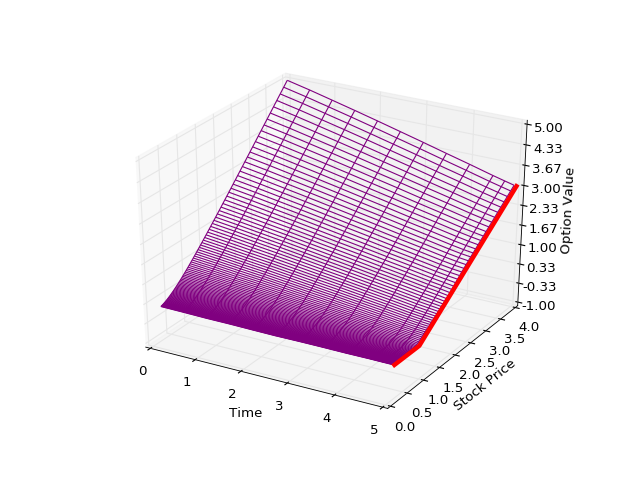

<IPython.core.display.Javascript object>


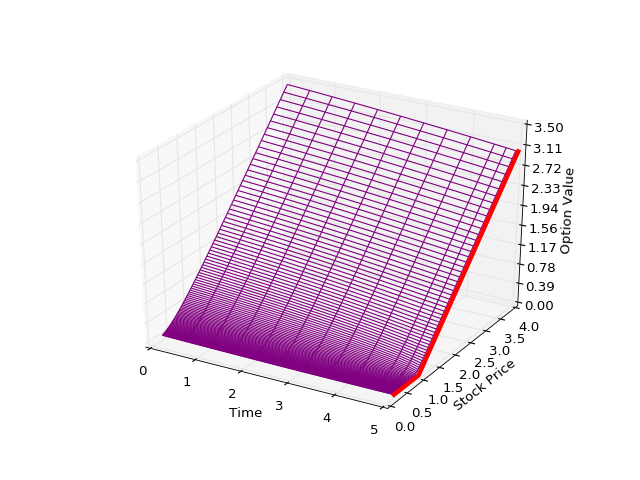

<IPython.core.display.Javascript object>


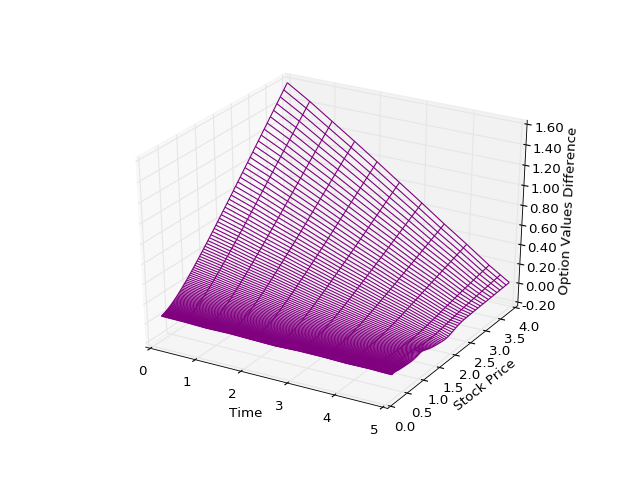

In [16]:
compare('eu_call')

## European put

<IPython.core.display.Javascript object>


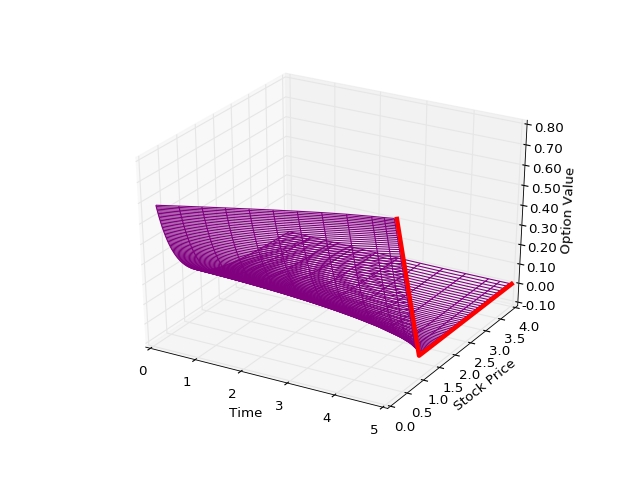

<IPython.core.display.Javascript object>


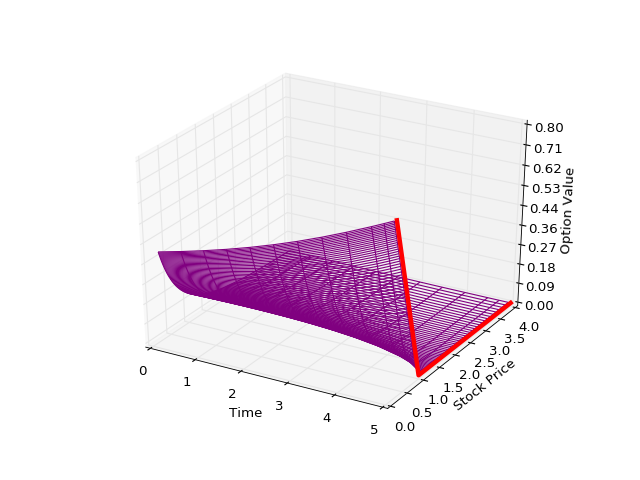

<IPython.core.display.Javascript object>


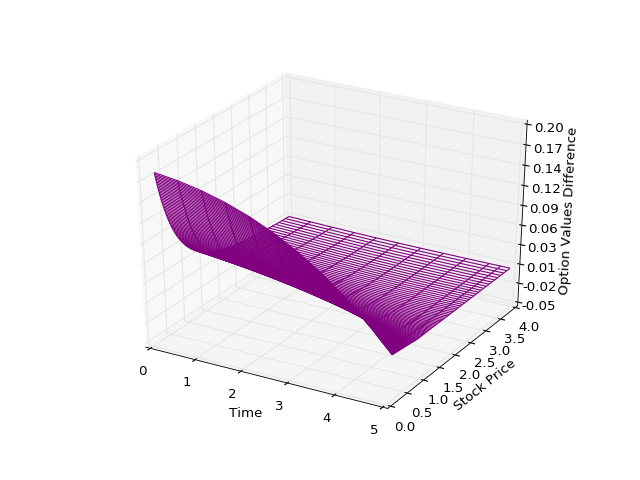

In [17]:
compare('eu_put')

## Cash-or-nothing call

<IPython.core.display.Javascript object>


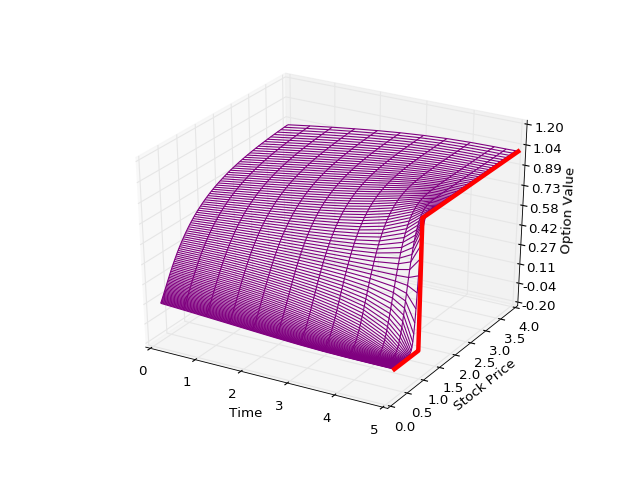

<IPython.core.display.Javascript object>


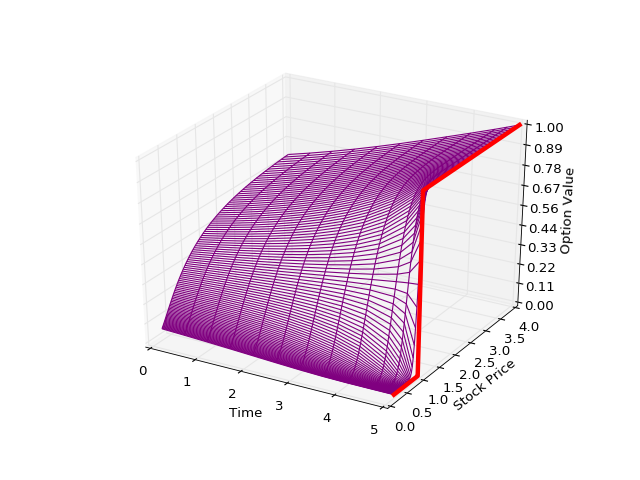

<IPython.core.display.Javascript object>


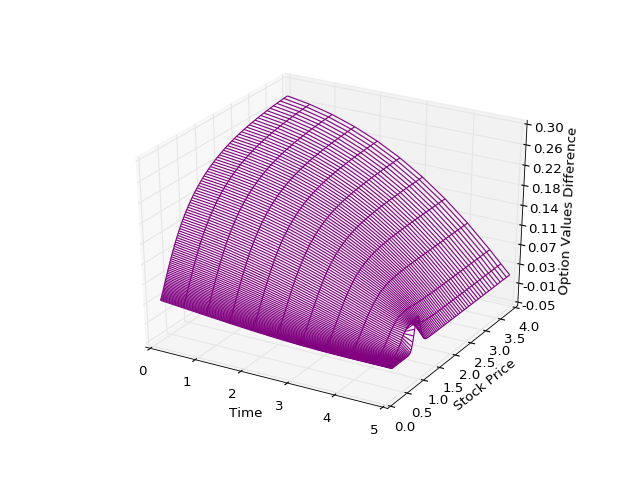

In [18]:
compare('cash_or_nothing_call')

## Cash-or-nothing put

<IPython.core.display.Javascript object>


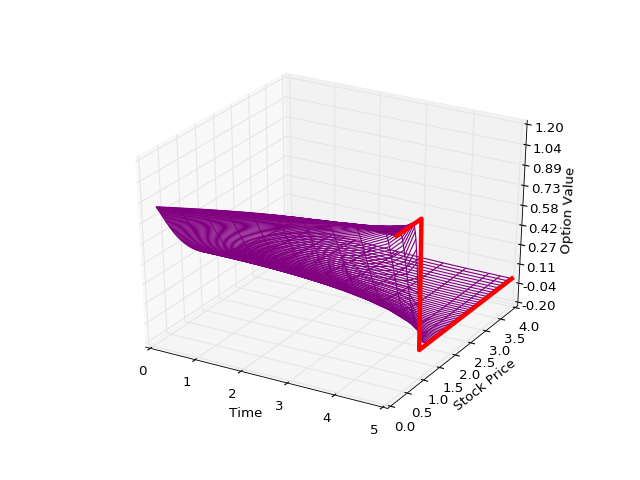

<IPython.core.display.Javascript object>


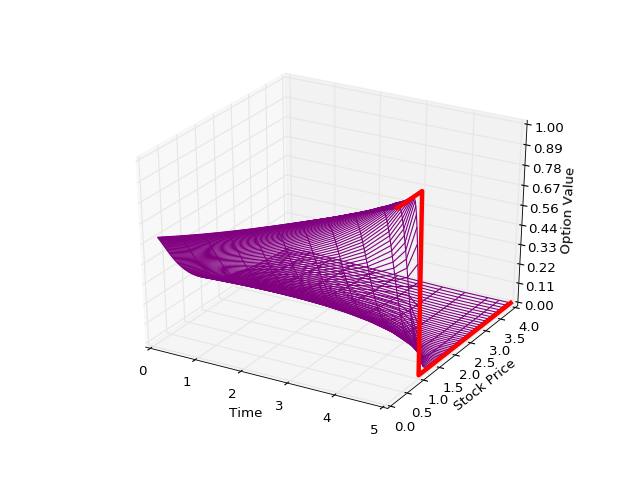

<IPython.core.display.Javascript object>


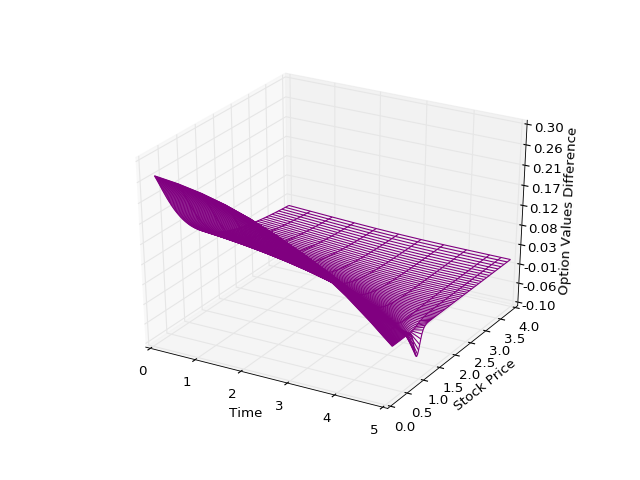

In [19]:
compare('cash_or_nothing_put')

## Asset-or-nothing call

<IPython.core.display.Javascript object>


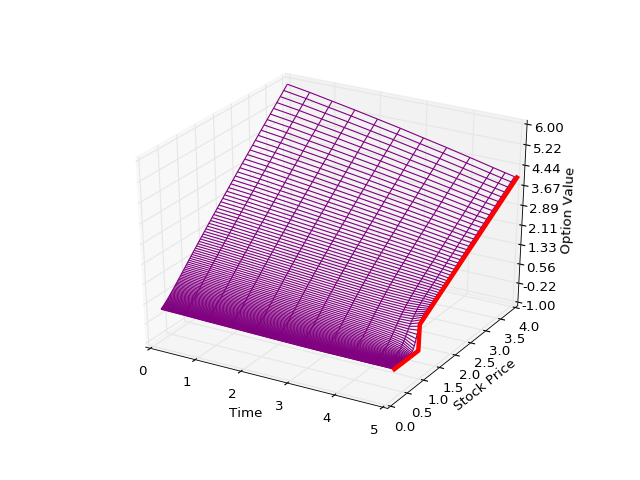

<IPython.core.display.Javascript object>


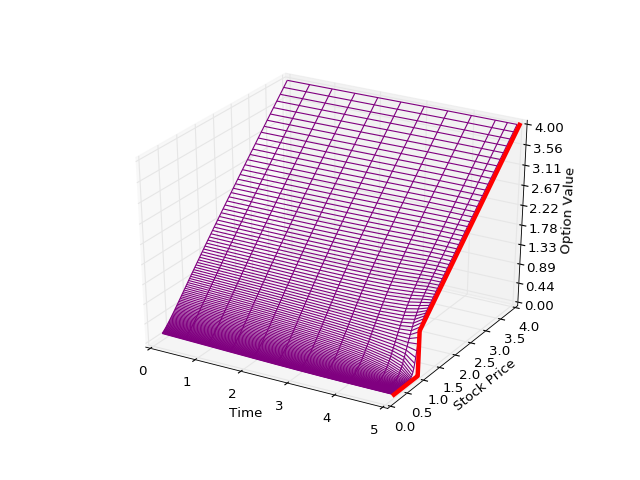

<IPython.core.display.Javascript object>


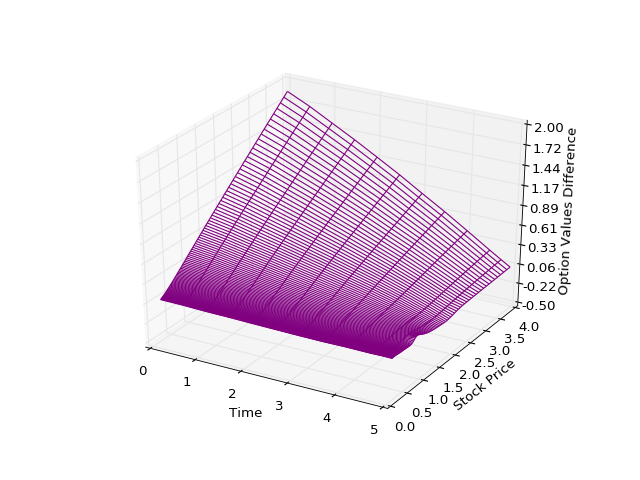

In [20]:
compare('asset_or_nothing_call')

## Asset-or-nothing put

<IPython.core.display.Javascript object>


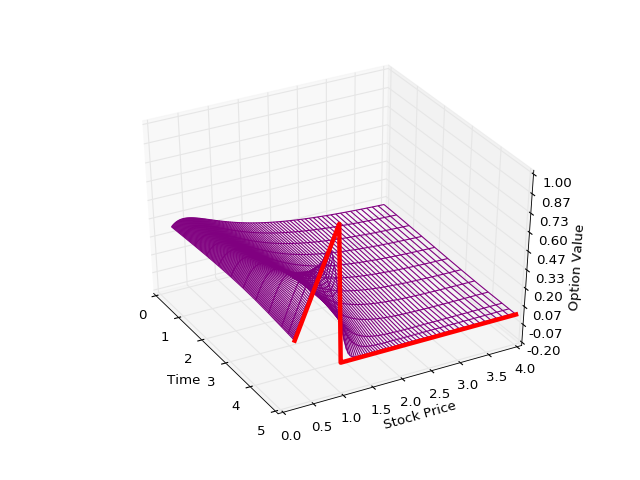

<IPython.core.display.Javascript object>


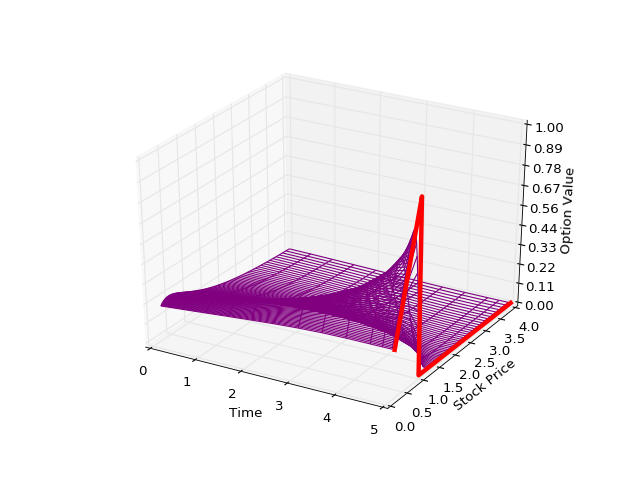

<IPython.core.display.Javascript object>


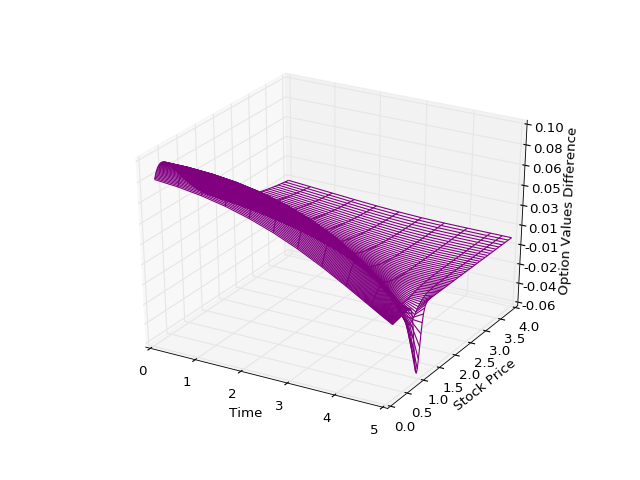

In [21]:
compare('asset_or_nothing_put')